# Parameter Tuning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import time 
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

random.seed(10)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
path = '02_15_subjectindependent_softeningchanges.xlsx'
result_org1 = pd.read_excel(path, index_col=0)
result1 = result_org1[result_org1['Training/Test'] == 'Test']
result1 = result1[result1['MPIW'] >= 0]
print(result1.shape)

path = '02_15_subjectindependent_lambdachanges.xlsx'
result_org2 = pd.read_excel(path, index_col=0)
result2 = result_org2[result_org2['Training/Test'] == 'Test']
result2 = result2[result2['MPIW'] >= 0]
print(result2.shape)

(88, 11)
(57, 11)


In [4]:
print(result1['soften'].unique())
print(result2['lambda'].unique())
# print(result.alpha.unique())

[ 10  50  90 130 170 210]
[ 5 15 25 35 45 55]


In [6]:
result1['soften_new'] = np.where(result1['soften'] <= 110, '<=110', '>110')
result2['lambda_new'] = np.where(result2['lambda'] <= 20, '<=20', '>20')

In [7]:
print(result2.shape)

index_result2 = result2[(result2['MPIW'] <= 0.5) &(result2['PICP'] >= 0.75) ].index
result2.drop(index_result2 , inplace=True)
# df.head(15)
print(result2.shape)

(57, 12)
(55, 12)


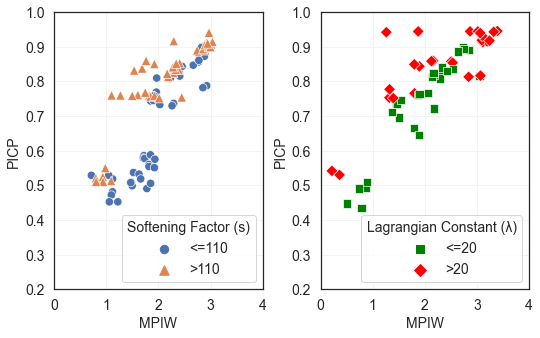

In [21]:
# Width: 789 – 2250 pixels (at 300 dpi). Height maximum: 2625 pixels (at 300 dpi).

# desired_dpi = 600
# # desired_width_px = 4000
# # desired_height_px = 5249

# desired_width_px = 3000
# desired_height_px = 4249

desired_dpi = 300
# desired_width_px = 4000
# desired_height_px = 5249

# desired_width_px = 2250
# desired_height_px = 2625

desired_width_px = 2249
desired_height_px = 2325




scatter_size = 800
sns.color_palette("tab10")
# desired_dpi = 600

# desired_width_px = 4499
# desired_height_px = 5250

fig_width = desired_width_px / desired_dpi
fig_height = desired_height_px / (desired_dpi * 1.65)

# Set the figsize parameter when creating the figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(fig_width, fig_height))

sns.set(style="white", rc={"font.size": 14}, color_codes=True)

sns.scatterplot(x='MPIW', y='PICP', data=result1, style='soften_new',
                sizes=(90, 70), markers=['o', '^'], size='soften_new',
                ax=axs[0], color='orangered', hue='soften_new')

sns.scatterplot(x='MPIW', y='PICP', data=result2, style='lambda_new',
                sizes=(70, 70), markers=['s', 'D'], size='lambda_new',
                ax=axs[1], palette=['green', 'red'], hue='lambda_new')

# Adjust the legend size to 12
axs[0].legend(loc='lower right', title='Softening Factor (s)', fontsize=14,title_fontsize=14)
axs[1].legend(loc='lower right', title='Lagrangian Constant (λ)', fontsize=14,title_fontsize=14)

axs[0].set(ylim=(0.2, 1))
axs[1].set(ylim=(0.2, 1))
axs[0].set(xlim=(0.0, 4))
axs[1].set(xlim=(0.0, 4))

for ax in axs.flatten():
    ax.grid(alpha=0.2)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='both', labelsize=14)

fig.tight_layout(pad=0.5)

fig.savefig('paramater_tuning_March29.tif', dpi=desired_dpi,  format="tif",facecolor='white',pil_kwargs={"compression": "tiff_lzw"})
# plt.savefig('paramater_tuning_Nov21.png')

plt.show()


